## Metric Client

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from metrics.core import MetricClient
import matplotlib.pyplot as plt

/home/bartosz/anaconda3/envs/vss-sandbox/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
client = MetricClient()

2022-10-27 15:58:14.377 | INFO     | metrics.core:init_all_metric_models:54 - Loading metric models: ['dogs', 'shoes']
  0%|                                                                                                                                              | 0/2 [00:00<?, ?it/s]/home/bartosz/anaconda3/envs/vss-sandbox/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/bartosz/anaconda3/envs/vss-sandbox/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|████████████████████████████████████

In [3]:
def samples(collection: str, k: int):
    anchor, similars = client._get_random_images_from_collection(collection, k=k)
    
    return anchor

In [4]:
anchor_example = samples(collection="dogs", k=5)

In [5]:
from PIL import Image, ImageDraw

In [6]:
img = Image.open(f"../data/metric_datasets/dogs/{anchor_example[0]}")

In [7]:
img.show()

In [8]:
anchor, similars, imgs = client._get_best_choice_for_uploaded_image(
    base_img=img, 
    collection_name="dogs",
    k=5,
    grid_nrow=3,
    benchmark=0,
)

<PIL.Image.Image image mode=RGB size=908x606 at 0x7FEFF0076E50>


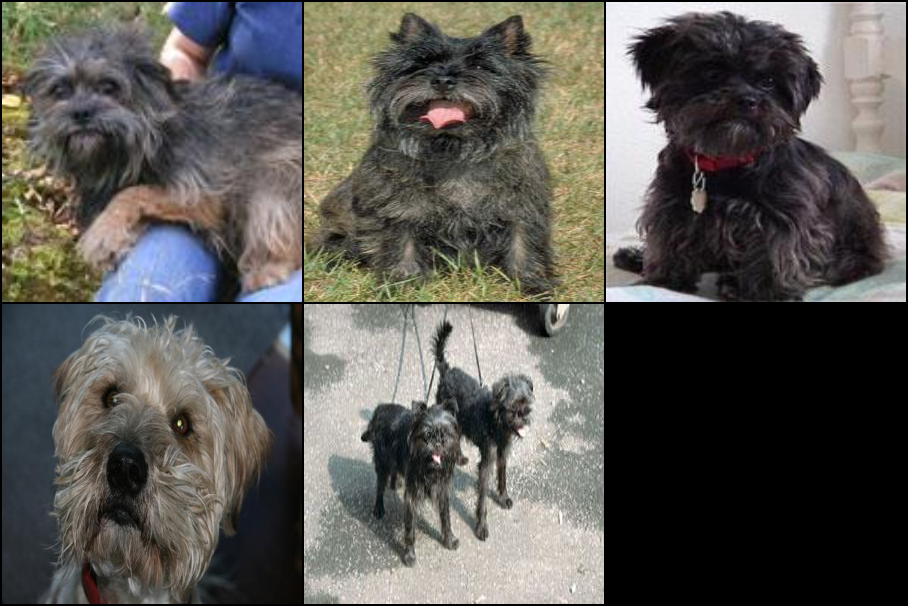

In [9]:
similars

In [12]:
tensor_image = imgs[0]

In [48]:
import torchvision
from PIL import Image, ImageDraw, ImageFont

In [49]:
t = torchvision.transforms.ToPILImage()

In [54]:
imgs_transformed = [t(img) for img in imgs]

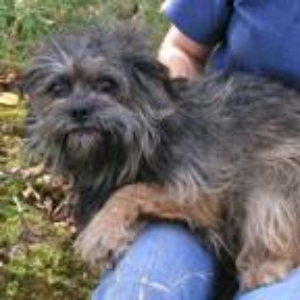

In [55]:
imgs_transformed[0]

In [58]:
myFont = ImageFont.truetype('FreeMonoBold.ttf', 40)
for img in imgs_transformed:
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), "95,91%", font=myFont, fill=(255, 0, 0))

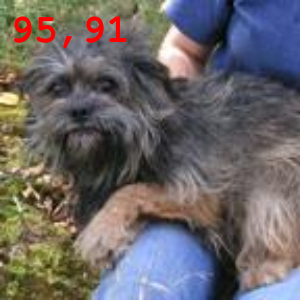

In [65]:
imgs_transformed[0]

In [26]:
imgs_scored = [ImageDraw.Draw(img).text((28, 36), "nice Car", fill=(255, 0, 0)) for img in imgs_transformed]

In [39]:
imgs_transformed[0].text((28, 36), "nice Car", fill=(255, 0, 0))

In [78]:
imgs_transformed[2::3][1]

IndexError: list index out of range

In [74]:
for img in imgs_transformed:
    img

In [67]:
[col_img for col_img in similars if similars.index(col_img) % 3 == 0]

TypeError: 'Image' object is not iterable

In [ ]:

# Importing the PIL library
from PIL import Image
from PIL import ImageDraw
 
# Call draw Method to add 2D graphics in an image
I1 = ImageDraw.Draw(img)
 
# Add Text to an image
I1.text((28, 36), "nice Car", fill=(255, 0, 0))